<a href="https://colab.research.google.com/github/Madhu-712/Transfer-Learning/blob/master/Transferlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'drive/MyDrive/Datasets/Train'
valid_path = 'drive/MyDrive/Datasets/Test'

In [ ]:
train_path

'drive/MyDrive/Datasets/Train'

In [ ]:
valid_path

'drive/MyDrive/Datasets/Test'

In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
# useful for getting number of classes
folders = glob('drive/MyDrive/Datasets/Train/*')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folders

['drive/MyDrive/Datasets/Train/Dog', 'drive/MyDrive/Datasets/Train/Cat']

In [ ]:
len(folders)

2

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(10, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
prediction

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_1')>

In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model

In [ ]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
train_datagen

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
train_datagen

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('drive/MyDrive/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 30 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('drive/MyDrive/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 28 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('drive/MyDrive/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 28 images belonging to 2 classes.


In [ ]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
1/1 [==============================] - 34s 34s/step - loss: 0.7421 - accuracy: 0.4667 - val_loss: 1.0073 - val_accuracy: 0.5357
Epoch 2/5
1/1 [==============================] - 32s 32s/step - loss: 0.8882 - accuracy: 0.5000 - val_loss: 1.2795 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 33s 33s/step - loss: 0.9391 - accuracy: 0.5000 - val_loss: 0.8635 - val_accuracy: 0.6071
Epoch 4/5
1/1 [==============================] - 33s 33s/step - loss: 0.5353 - accuracy: 0.6333 - val_loss: 0.4001 - val_accuracy: 0.8929
Epoch 5/5
1/1 [==============================] - 31s 31s/step - loss: 0.1842 - accuracy: 1.0000 - val_loss: 0.7375 - val_accuracy: 0.6071


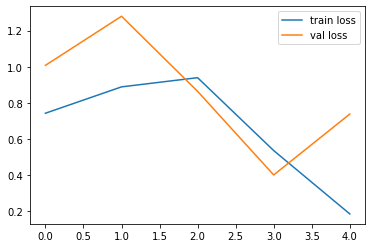

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

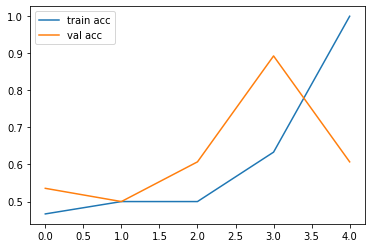

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [165]:
import tensorflow as tf

from keras.models import load_model

model.save('transferlearning_model.h5')

In [166]:
import numpy as np

In [167]:
model=load_model('transferlearning_model.h5')

In [168]:
from keras.preprocessing import image

In [233]:
test_image=image.load_img('/content/drive/MyDrive/Colab Notebooks/cat.9029.jpg',target_size=(224,224,3))

In [257]:
test_image=image.load_img('/content/drive/MyDrive/Colab Notebooks/dog.9056.jpg',target_size=(224,224))

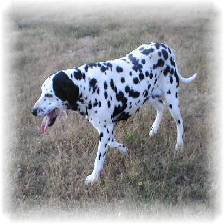

In [258]:
test_image

In [259]:
test_image=image.img_to_array(test_image)

In [260]:
test_image

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [261]:
test_image=np.expand_dims(test_image,axis=0)

In [262]:
test_image

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [263]:
result=model.predict(test_image)

In [264]:
result

array([[0., 1.]], dtype=float32)

In [273]:
if result[0][0]==1:
   prediction=0
   print('cat')
else:
   prediction=1
   print('dog')

dog


In [243]:
test_image=image.load_img('/content/drive/MyDrive/Colab Notebooks/cat.9029.jpg',target_size=(224,224,3))

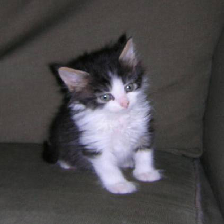

In [244]:
test_image

In [248]:
test_image=image.img_to_array(test_image)

In [249]:
test_image

array([[[61., 60., 56.],
        [63., 62., 58.],
        [60., 59., 55.],
        ...,
        [52., 53., 48.],
        [53., 54., 49.],
        [53., 54., 49.]],

       [[63., 62., 58.],
        [65., 64., 60.],
        [62., 61., 57.],
        ...,
        [53., 54., 49.],
        [53., 54., 49.],
        [54., 55., 50.]],

       [[62., 61., 57.],
        [64., 63., 59.],
        [61., 60., 56.],
        ...,
        [53., 54., 49.],
        [49., 50., 45.],
        [49., 50., 45.]],

       ...,

       [[88., 88., 88.],
        [90., 90., 90.],
        [90., 90., 90.],
        ...,
        [50., 50., 50.],
        [47., 47., 47.],
        [45., 45., 45.]],

       [[88., 88., 88.],
        [90., 90., 90.],
        [89., 89., 89.],
        ...,
        [52., 52., 52.],
        [49., 49., 49.],
        [48., 48., 48.]],

       [[85., 85., 85.],
        [87., 87., 87.],
        [85., 85., 85.],
        ...,
        [54., 54., 54.],
        [52., 52., 52.],
        [48., 48., 48.]]

In [256]:
if result[0][0]==1:
   prediction=0
   print('dog')
else:
   prediction =1
   print('cat')

cat
